In [ ]:
# Task 2 - Credit Card Fraud detection
# Task 3 - Customer Churn Prediction
# Task 4 - Spam SMS Detection

# <h><center><b>**CodSoft Internship Program**</b></center></h>
### <h><center><b>**TASK 2 - Credit Card Fraud Detection**</b></center></h>

**GitHub Repository-** **https://github.com/anweshabose/CodSoft_Credit_Card_Fraud_Detection**

<h1><b>Credit Card Fraud Detection Model</b></h1>

![](https://www.xenonstack.com/hubfs/xenonstack-credit-card-fraud-detection.png)

# **Are you sure, that the transactions that are taking place though your credit card, are made by you?**
#### **Be conscious about you Financial Security so that you Don't have to Repent Later**

# **Introduction**

With increased dependencies on online Transactions, our financial sequrity is in threat. So, it is very important to have financial awarness and be financially secure. To maintain financial conciousness it is essential to be aware on several financial basis. For that reason we present you an automated Credit card Fraud Detection System to be a part of your financial conciousness.

In these days, there may be several credit card frauds like `Credit skimming` where card information is stolen by fraudsters from backend when card holder is swiping the card in ATM while fetching money, or `Phishing Scams` where fraudsters seek for card details pretending to be an authorised legitimate company, or may be other kind of scams/frauds. Thus, there is an urgent need to maintain security about credit card transactions that are taking place through your Credit Card.

This is a complex supervised machine learning problem that uses classification algorithm like Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree & Random Forest to perform the fraud detection task. Out of all these algorithms, Logistic Regression and Random Forest is used here and whose performance will be best, will only be used for detecting fraud.


# **Project Outline**

**Steps that we follow:**

- Installing and importing all the required libraries.
- Importing the csv file.
- Data Description.
- Data Processing
- i) Data Processing - Finding and filling Missing Values
- ii) Data Processing - Encoding for Categorical columns
- Exploratory Data Analysis (EDA)
- Feature Scaling
- Prepare the Dataset for ML Training
- Model 1: Logistic Regression
- Model 2: Random Forest Classifier
- Evaluate the Best Model (Performance Evaluation)
- Make Predictions on New Data
- Summary

# Installing and importing all the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Importing the CSV file

In [ ]:
df = pd.read_csv("fraudTest.csv")

In [ ]:
df.drop(df.columns.difference(['trans_date_trans_time','amt','category','merchant','merch_lat','merch_long','city','state',
'lat','long','city_pop', 'unix_time', 'is_fraud']),axis=1, inplace=True)

In [ ]:
df.head(3)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,Columbia,SC,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,Altonah,UT,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Bellmore,NY,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0


# Data Description

**Here are the complete names of the columns of Fraud Test dataset**

- trans_date_trans_time – The date and time when the transaction occurred.
- cc_num – The credit card number used for the transaction (usually anonymized for security).
- merchant – The name of the merchant where the transaction took place.
- category – The type of goods or services purchased (e.g., travel, personal care).
- amt – The amount of money spent in the transaction.
- first – The first name of the individual making the transaction.
- last – The last name of the individual making the transaction.
- gender – The gender of the cardholder.
- street – The street address associated with the cardholder.
- city – The city where the cardholder resides.
- state – The state of residence of the cardholder.
- zip – The ZIP code of the cardholder’s address.
- lat – The latitude coordinate of the cardholder's location.
- long – The longitude coordinate of the cardholder's location.
- city_pop – The population of the city where the cardholder resides.
- job – The cardholder’s job title or profession.
- dob – The date of birth of the cardholder.
- trans_num – A unique identifier for the transaction.
- unix_time – The transaction timestamp represented in Unix format (seconds since January 1, 1970).
- merch_lat – The latitude coordinate of the merchant's location.
- merch_long – The longitude coordinate of the merchant's location.
- is_fraud – A label indicating whether the transaction is fraudulent (0 for non-fraudulent, 1 for fraudulent).

In [ ]:
df.describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,69.392810,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,156.745941,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,1.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,9.630000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,47.290000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,83.010000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,22768.110000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   merchant               555719 non-null  object 
 2   category               555719 non-null  object 
 3   amt                    555719 non-null  float64
 4   city                   555719 non-null  object 
 5   state                  555719 non-null  object 
 6   lat                    555719 non-null  float64
 7   long                   555719 non-null  float64
 8   city_pop               555719 non-null  int64  
 9   unix_time              555719 non-null  int64  
 10  merch_lat              555719 non-null  float64
 11  merch_long             555719 non-null  float64
 12  is_fraud               555719 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 55.1+ MB


In [ ]:
df.shape

(555719, 13)

# Data Processing

# i) Data Processing - Finding and filling Missing Values

In [ ]:
df.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Thus there is no Missing value.

# ii) Data Processing - Encoding for Categorical columns

In [ ]:
# For merchant column
# Compute target mean encoding
merchant_target_mean = df.groupby('merchant')['is_fraud'].mean()

# Map values to original dataset
df['merchant'] = df['merchant'].map(merchant_target_mean)

df.head(2)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,0.004076,personal_care,2.86,Columbia,SC,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,0.001274,personal_care,29.84,Altonah,UT,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0


In [ ]:
# For category column
# Compute target mean encoding
category_target_mean = df.groupby('category')['is_fraud'].mean()

# Map values to original dataset
df['category'] = df['category'].map(category_target_mean)

df.head(2)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,0.004076,0.00178,2.86,Columbia,SC,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,0.001274,0.00178,29.84,Altonah,UT,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0


### Since, these columns have a direct relationship with fraud likelihood. Certain merchants or transaction categories might have higher or lower fraud rates. For that reason, `Target Encoding` is performed here.

In [ ]:
# For city column
# Compute frequency encoding
city_freq = df['city'].value_counts()

# Map encoding to the dataset
df['city'] = df['city'].map(city_freq)

df.head(2)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,0.004076,0.00178,2.86,640,SC,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,0.001274,0.00178,29.84,837,UT,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0


In [ ]:
# For state column
# Compute frequency encoding
state_freq = df['state'].value_counts()

# Map encoding to the dataset
df['state'] = df['state'].map(state_freq)

df.head(2)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,0.004076,0.00178,2.86,640,12541,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,0.001274,0.00178,29.84,837,4658,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0


### Cities and states have many unique values but might not directly affect fraud probability in a statistical sense. So, `Frequency Encoding` is performed here.

In [ ]:
# For city_pop column
# Initialize Standard Scaler
scaler = StandardScaler()

# Apply scaling
df['city_pop'] = scaler.fit_transform(df[['city_pop']])

df.head(2)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,0.004076,0.00178,2.86,640,12541,33.9659,-80.9355,0.816521,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,0.001274,0.00178,29.84,837,4658,40.3207,-110.4360,-0.292685,1371816873,39.450498,-109.960431,0


### Population is basically based on the area quality, so one can't say more population means less fraud. So, we need to scale the population column.

In [ ]:
# For trans_date_trans_time column
# Helps capture behavioral patterns in fraudulent transactions.
# Extract time-based features

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
df['hour'] = df['trans_date_trans_time'].dt.hour
df['dayofweek'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year
df['unix_time1'] = df['trans_date_trans_time'].astype('int64') // 10**9
df.drop("trans_date_trans_time", axis=1, inplace=True)
df.head(2)

,merchant,category,amt,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,dayofweek,month,year,unix_time1
0,0.004076,0.00178,2.86,640,12541,33.9659,-80.9355,0.816521,1371816865,33.986391,-81.200714,0,12,6,6,2020,1592741665
1,0.001274,0.00178,29.84,837,4658,40.3207,-110.4360,-0.292685,1371816873,39.450498,-109.960431,0,12,6,6,2020,1592741673


### Thus all categorical columns are successfully handled.

In [ ]:
df.shape

(555719, 17)

# Exploratory Data Analysis (EDA)

In [ ]:
df.corr()

,merchant,category,amt,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,dayofweek,month,year,unix_time1
merchant,1.000000,0.836533,0.081423,0.002544,-0.000029,0.004339,-0.004916,0.000048,-0.001426,0.004433,-0.004853,0.067333,-0.298412,0.002348,-0.000094,NaN,-0.001426
category,0.836533,1.000000,0.090566,0.003313,0.000552,0.003621,-0.006367,-0.000783,-0.000651,0.003688,-0.006288,0.057733,-0.355117,0.000712,0.001081,NaN,-0.000651
amt,0.081423,0.090566,1.000000,-0.005848,0.002364,0.002339,-0.002046,0.002760,-0.000974,0.002404,-0.002053,0.182267,-0.029860,0.003414,-0.000717,NaN,-0.000974
city,0.002544,0.003313,-0.005848,1.000000,0.031620,-0.072588,-0.034536,0.264460,-0.001679,-0.072318,-0.034546,-0.028534,0.086939,-0.003846,-0.002475,NaN,-0.001679
state,-0.000029,0.000552,0.002364,0.031620,1.000000,-0.193373,0.163893,0.164620,-0.000126,-0.191974,0.163767,-0.004513,0.002103,-0.000902,-0.000304,NaN,-0.000126
lat,0.004339,0.003621,0.002339,-0.072588,-0.193373,1.000000,-0.012892,-0.152666,0.000301,0.993557,-0.012831,0.005863,-0.010676,0.001093,0.000686,NaN,0.000301
long,-0.004916,-0.006367,-0.002046,-0.034536,0.163893,-0.012892,1.000000,-0.051524,-0.001460,-0.012551,0.999115,-0.000972,-0.001595,0.000099,-0.001510,NaN,-0.001460
city_pop,0.000048,-0.000783,0.002760,0.264460,0.164620,-0.152666,-0.051524,1.000000,-0.000740,-0.151703,-0.051489,-0.004910,0.018937,-0.002010,-0.001117,NaN,-0.000740
unix_time,-0.001426,-0.000651,-0.000974,-0.001679,-0.000126,0.000301,-0.001460,-0.000740,1.000000,0.000365,-0.001485,-0.013066,-0.000304,-0.009987,0.988955,NaN,1.000000
merch_lat,0.004433,0.003688,0.002404,-0.072318,-0.191974,0.993557,-0.012551,-0.151703,0.000365,1.000000,-0.012496,0.005812,-0.010512,0.001199,0.000750,NaN,0.000365


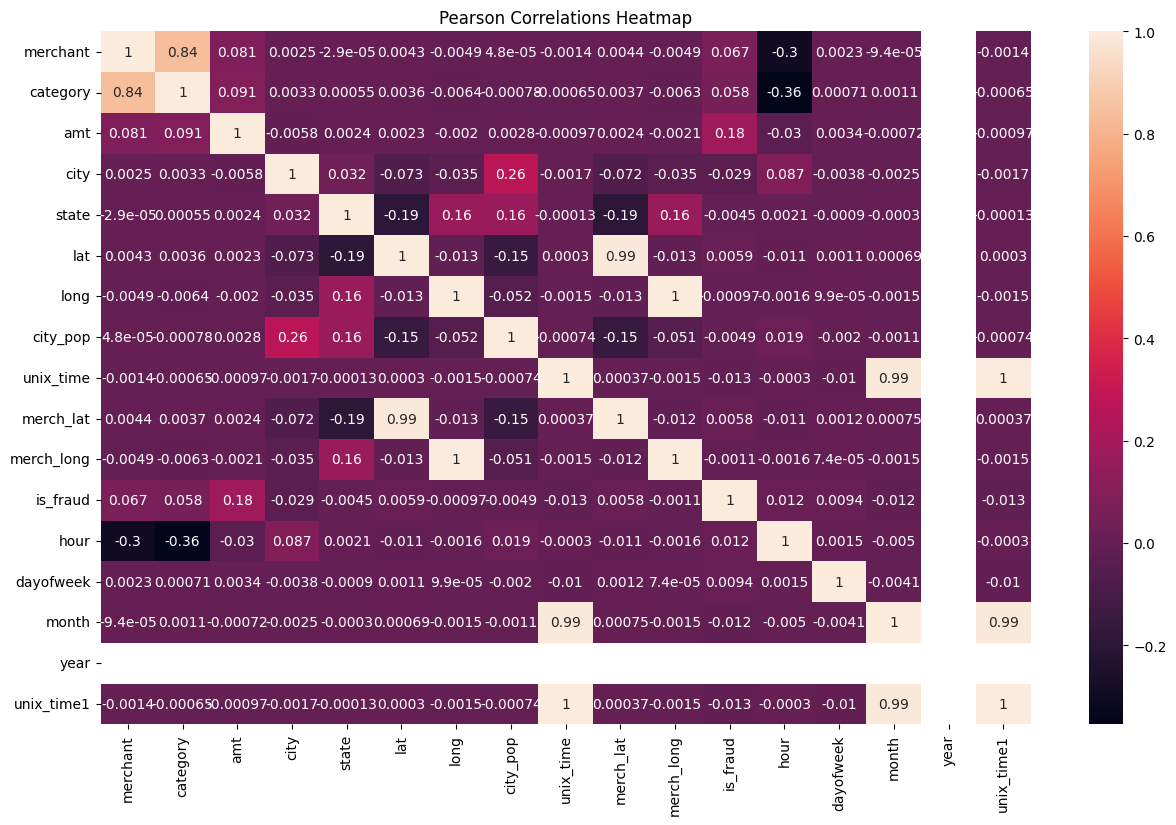

In [ ]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True).set_title("Pearson Correlations Heatmap")
plt.show()

In [ ]:
df.is_fraud.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

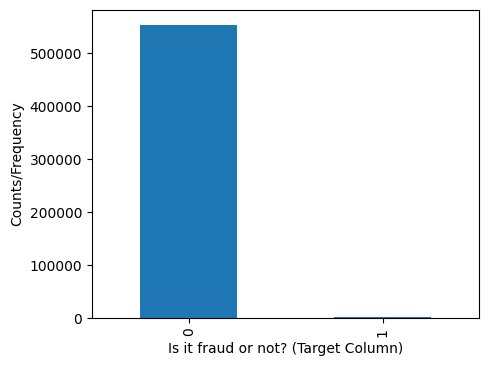

In [ ]:
plt.figure(figsize = (5, 4))
df.is_fraud.value_counts().plot(kind = "bar")
plt.xlabel("Is it fraud or not? (Target Column)")
plt.ylabel("Counts/Frequency")
plt.show()

# Feature Scaling
Feature Scaling is a technique used in machine learning to normalize or standardize numerical data so that features are on a similar scale.

In [ ]:
# Standardizes the features by subtracting the mean and dividing by the standard deviation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('is_fraud', axis=1))  
# Target variable should be excluded from scaling

In [ ]:
X = pd.DataFrame(scaled_features, columns=df.drop(columns=["is_fraud"]).columns)  # X: Independent variable
y = df["is_fraud"]   # y: Dependent variable

# Prepare the Dataset for ML Training
Preparing the dataset is essential because we don't have to train the entire dataset. Maximum part of the dataset will be used for training and remaining part will be used for testing the accuracy. 
If Accuracy is not met then we have to tune the model or else we have to change the algorithm.

In [ ]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(444575, 16)

In [ ]:
X_test.shape

(111144, 16)

# **Model 1: Logistic Regression**

In [ ]:
# Model Training: Here, we are training the model with X_train and y_train
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predicting the trained-model on X_test to get the predicted values of y.
logistic_y_preds = log_model.predict(X_test)

In [ ]:
# Logistic accuracy score: checking whether predicted values of y is equal to Actual values of y.
log_accuracy = accuracy_score(y_test, logistic_y_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

Logistic Regression Accuracy: 1.00


### Accuracy: 1.00 means there is 100% match between Actual and Predicted values of y.

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_y_preds))

Confusion Matrix:
 [[110685     33]
 [   424      2]]


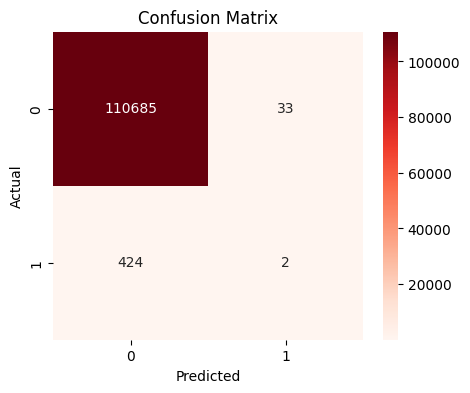

In [ ]:
# Visualize Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, logistic_y_preds), annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Model 2: Random Forest Classifier**

In [ ]:
# Model Training: Here, we are training the model with X_train and y_train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicting the trained-model on X_test to get the predicted values of y.
rf_y_preds = rf_model.predict(X_test)

In [ ]:
# Random Forest accuracy score: checking whether predicted values of y is equal to Actual values of y.
rf_accuracy = accuracy_score(y_test, rf_y_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 1.00


### Accuracy: 1.00 means there is 100% match between Actual and Predicted values of y.

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_preds))

Confusion Matrix:
 [[110708     10]
 [   160    266]]


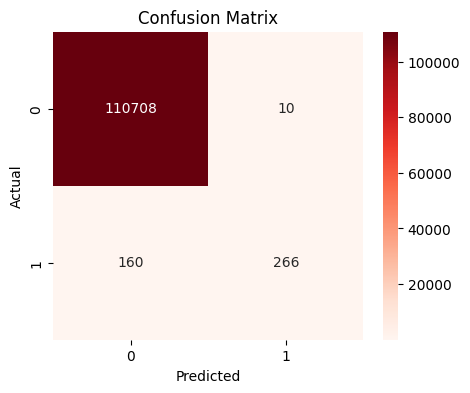

In [ ]:
# Visualize Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, rf_y_preds), annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the Best Model (Performance Evaluation)

In [ ]:
accuracy_list = []
precision_list = []
f1_score_list = []
recall_list = []

In [ ]:
accuracy_list.append(accuracy_score(y_test, logistic_y_preds))
precision_list.append(precision_score(y_test, logistic_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, logistic_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, logistic_y_preds, average='weighted'))

In [ ]:
accuracy_list.append(accuracy_score(y_test, rf_y_preds))
precision_list.append(precision_score(y_test, rf_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, rf_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, rf_y_preds, average='weighted'))

In [ ]:
print(accuracy_list)
print(precision_list)
print(recall_list)
print(f1_score_list)

[0.995888217087742, 0.9984704527459872]
[0.9925847093994498, 0.9984235018627695]
[0.995888217087742, 0.9984704527459872]
[0.9941481238251885, 0.9983075572822092]


In [ ]:
labels = ['Logistic Reg', 'Random Forest']

Text(0.5, 1.0, 'F1 Score')

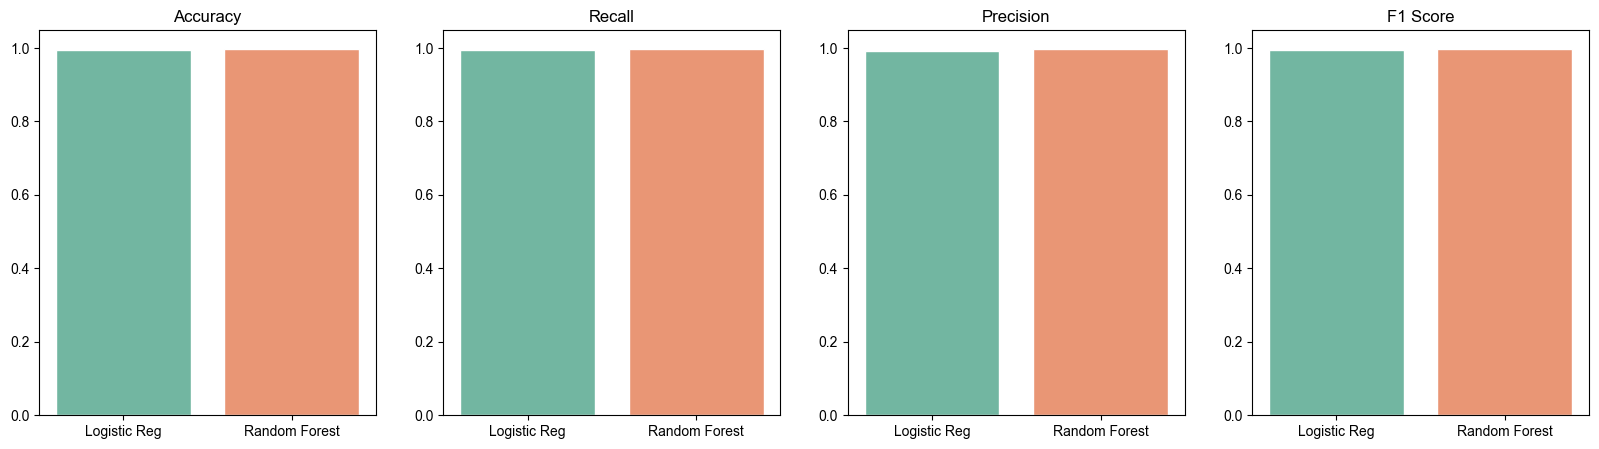

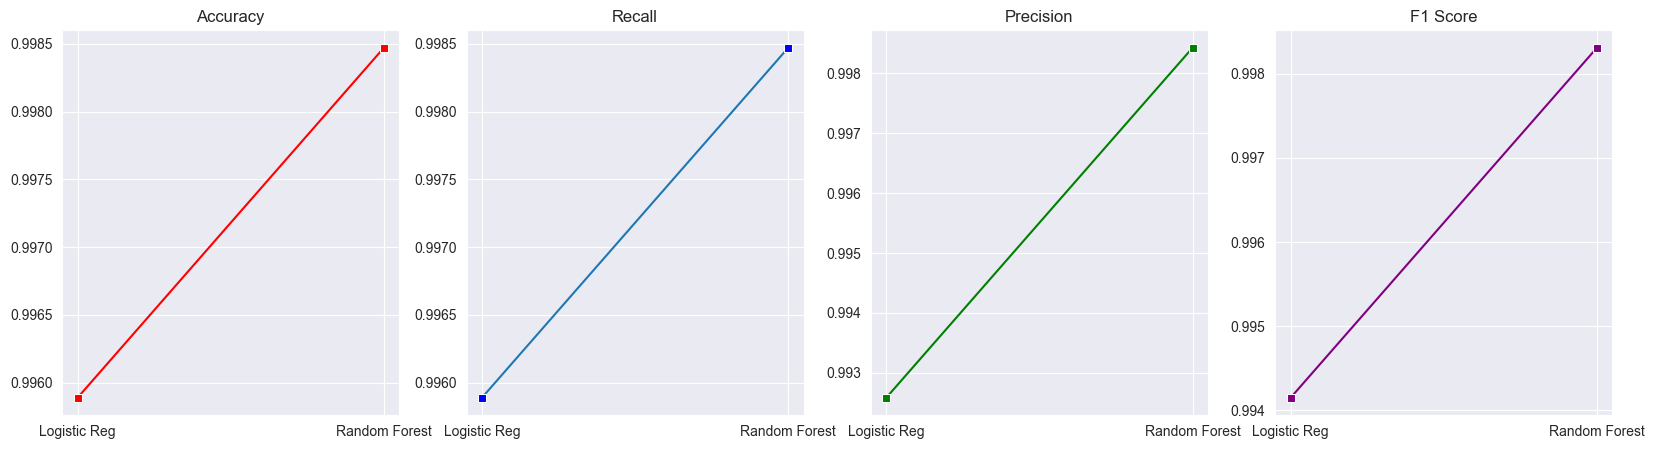

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
sns.set_style('darkgrid')
sns.barplot(x = labels, y = accuracy_list, palette = 'Set2', ax = ax[0]).set_title("Accuracy")
sns.barplot(x = labels, y = recall_list, palette = 'Set2', ax = ax[1]).set_title("Recall")
sns.barplot(x = labels, y = precision_list, palette = 'Set2', ax = ax[2]).set_title("Precision")
sns.barplot(x = labels, y = f1_score_list, palette = 'Set2', ax = ax[3]).set_title("F1 Score")

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sns.set_style('darkgrid')
sns.lineplot(x = labels, y = accuracy_list, palette = 'Set2', ax = ax[0], marker = 's', color = 'red').set_title("Accuracy")
sns.lineplot(x = labels, y = recall_list, palette = 'Set2', ax = ax[1], marker = 's', markerfacecolor = 'blue').set_title("Recall")
sns.lineplot(x = labels, y = precision_list, palette = 'Set2', ax = ax[2], marker = 's', color = 'green').set_title("Precision")
sns.lineplot(x = labels, y = f1_score_list, palette = 'Set2', ax = ax[3], marker = 's', color = 'purple').set_title("F1 Score")

### *In conclusion, the analysis of credit card fraud detection using machine learning algorithms, specifically Logistic Regression and Random Forest has provided valuable insights into their performance. Through rigorous evaluation and comparison, it is evident that Logistic Regression and Random Forest both emerges as the most effective algorithm for credit card fraud detection.*

## **Make Predictions on New Data**
### The Data that `You` will have to enter to detect `fraud transactions through your credit card`!!

In [ ]:
df.head(1)

,merchant,category,amt,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,dayofweek,month,year,unix_time1
0,0.004076,0.00178,2.86,640,12541,33.9659,-80.9355,0.816521,1371816865,33.986391,-81.200714,0,12,6,6,2020,1592741665


In [ ]:
# Assume new_data is a DataFrame containing new transactions
new_data = pd.DataFrame({
    'trans_date_trans_time': ['2020-09-23 23:56:13'], 
    'merchant': ['fraud_Rodriguez, Yost and Jenkins'],
    'category': ['misc_net'], 
    'amt': [820.97], 
    'city': ['Kirkwood'],
    'state': ['NY'],
    'lat': [42.0695],
    'long': [-75.7967],
    'city_pop': [3800],
    'unix_time': [1379980573],
    'merch_lat': [41.47287],
    'merch_long': [-74.880759]
})

# Apply the same preprocessing
new_data['trans_date_trans_time'] = pd.to_datetime(new_data['trans_date_trans_time'])
new_data['hour'] = new_data['trans_date_trans_time'].dt.hour
new_data['dayofweek'] = new_data['trans_date_trans_time'].dt.dayofweek
new_data['month'] = new_data['trans_date_trans_time'].dt.month
new_data['year'] = new_data['trans_date_trans_time'].dt.year
new_data['unix_time1'] = new_data['trans_date_trans_time'].astype('int64') // 10**9
new_data.drop('trans_date_trans_time', axis=1, inplace=True)

# Apply encoding using mappings from training data
new_data['merchant'] = new_data['merchant'].map(merchant_target_mean)
new_data['category'] = new_data['category'].map(category_target_mean)
new_data['city'] = new_data['city'].map(city_freq)
new_data['state'] = new_data['state'].map(state_freq)

# Handle missing encoded values (for unseen merchants/categories)
new_data.fillna(0, inplace=True)

# Check if the X_train and new_data columns are in same order
print("Expected Features:", X_train.columns)
print("New Data Features:", new_data.columns)


Expected Features: Index(['merchant', 'category', 'amt', 'city', 'state', 'lat', 'long',
       'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'hour', 'dayofweek',
       'month', 'year', 'unix_time1'],
      dtype='object')
New Data Features: Index(['merchant', 'category', 'amt', 'city', 'state', 'lat', 'long',
       'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'hour', 'dayofweek',
       'month', 'year', 'unix_time1'],
      dtype='object')


In [ ]:
# Ensure new_data follows the same order as X_train
new_data = new_data[X_train.columns]

# Standardize the feature set (excluding the target variable)
scaled_new_data = scaler.transform(new_data)

# Make predictions
prediction = log_model.predict(scaled_new_data)
print(f"Predicted Fraud Status: {'Fraud' if prediction[0] == 1 else 'Not Fraud'}")

Predicted Fraud Status: Not Fraud


In [ ]:
# Shows fraud percentage
print(df["is_fraud"].value_counts(normalize=True)) 

is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64


### **Thus, "Not Fraud" cases are more than 99% and "Fraud" cases are even less than 1%.** 
### **So, Fraud cases in the dataset are significantly lower compared to non-fraud cases, for that reason model is extremely biased towards predicting "Not Fraud". Thus, model may NOT be able to predict "Fraud" cases even when its Accuracy level shows 100% by Logistic Regression and Random Forest.**

# **Summary**

We downloaded, explored, performed EDA(Exploratory Data Analysis), observed for any missing values and trained few models to search the best model out of it and used that perticular model/algorithm for Credit card fraud Detection.

- Total Dataset contains 555719 rows and 13 columns.
- After Data processing it has 555719 rows and 17 columns.
- Performed Exploratory Data Analysis.
- Normalized the entire Data.
- Then split the data into train data and test data.
- Training data had approximately 444575 rows and 17 columns.
- Test data had approximately 111144 rows and 17 columns.
- Trained the model to perform the required Application of detecting Credit card fraud correctly.
- Trained two models:
`LogisticRegression` and `RandomForest`.
Both `LogisticRegression` and `RandomForest` were best as it gave the accuracy of 100% on the dataset.

### **Now you can also detect Credit card fraud transactions just by providing few necessary Informations. 😊**

## **THANK YOU 😊**